In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
f = open ('ultimate_data_challenge.json', "r")

In [3]:
data = json.loads(f.read())

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
df['signup_date']= pd.to_datetime(df['signup_date'])

In [8]:
df['last_trip_date']= pd.to_datetime(df['last_trip_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [10]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [11]:
date_cutoff = datetime.datetime(2014, 6, 1)

In [12]:
df['status'] = df['last_trip_date'].apply( lambda x: 'active' if (x > date_cutoff) else 'inactive')

In [13]:
df['Rating_band_of Driver'] = df['avg_rating_of_driver'].apply( lambda x: 'bad' if (x < 3) else 'average' if (3 < x < 4) else 'good')
df['Rating_band_by_Driver'] = df['avg_rating_by_driver'].apply( lambda x: 'bad' if (x < 3) else 'average' if (3 < x < 4) else 'good')





In [14]:
df[df['status'] == 'active']

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,status,Rating_band_of Driver,Rating_band_by_Driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,active,good,good
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,active,good,good
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,active,average,good
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,active,good,good
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,active,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49976,King's Landing,0,2014-01-21,2.0,1.00,2014-07-01,iPhone,0.0,False,100.0,2.39,4.0,active,bad,good
49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,False,50.0,2.53,5.0,active,good,good
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0,active,good,good
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,active,good,good


In [15]:
df['phone'].fillna('iPhone', inplace = True)

In [16]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace = True)

In [17]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  status                  50000 non-null  object

In [19]:
retained_pct = df[df['status'] == 'active']['status'].count() / df['status'].count()

In [20]:
print('Fraction of user retained = ' , retained_pct)

Fraction of user retained =  0.3662


In [21]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [22]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,status,Rating_band_of Driver,Rating_band_by_Driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,active,good,good
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,inactive,good,good
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,inactive,good,good
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,active,good,good
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,inactive,good,good


<AxesSubplot:xlabel='status', ylabel='Count'>

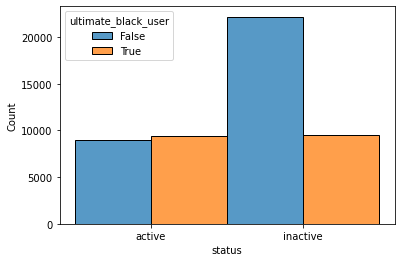

In [23]:
sns.histplot(x="status", hue="ultimate_black_user", data=df, multiple="dodge")

* From above Visualization we can see that if user is not an ultimate black user then he is twice unlikely to be inactive as compared to if he is subscribed for the services

In [24]:
df_num = df.select_dtypes(['int', 'float'])

In [25]:
df_num.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,4,4.7,1.10,15.4,46.2,3.67,5.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9
4,14,4.4,1.19,11.8,82.4,3.13,4.9


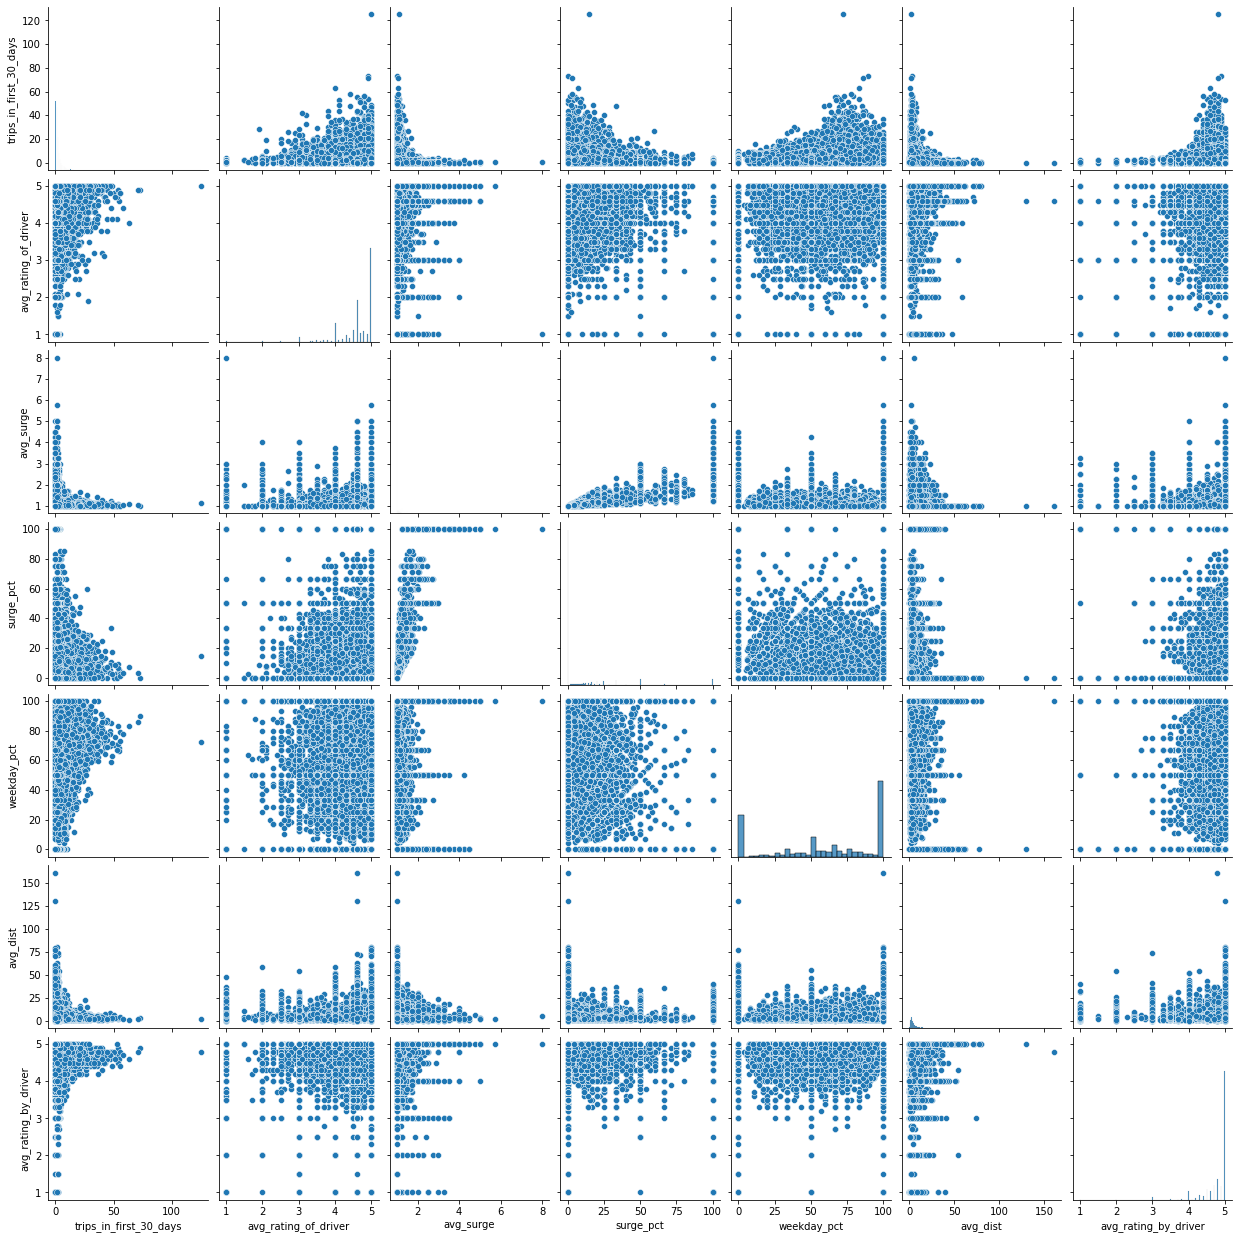

In [26]:
sns.pairplot(df_num)

#### Data Pre-Processing for the modeling

* We need to have categorical value dummified 

In [27]:
df = df.drop(columns = 'avg_rating_of_driver')

In [28]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_surge',
       'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'status',
       'Rating_band_of Driver', 'Rating_band_by_Driver'],
      dtype='object')

In [29]:
df_lr  = df.copy()

In [30]:
dum = pd.get_dummies(df[['city','phone','ultimate_black_user','Rating_band_by_Driver','Rating_band_of Driver', 'status']], drop_first = True)          




In [31]:
df_lr = pd.concat([df_lr,dum], axis = 1)

In [32]:
df_lr.head()

,city,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,...,Rating_band_by_Driver,ultimate_black_user,city_King's Landing,city_Winterfell,phone_iPhone,Rating_band_by_Driver_bad,Rating_band_by_Driver_good,Rating_band_of Driver_bad,Rating_band_of Driver_good,status_inactive
0,King's Landing,4,2014-01-25,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,...,good,True,1,0,1,0,1,0,1,0
1,Astapor,0,2014-01-29,1.00,2014-05-05,Android,0.0,False,50.0,8.26,...,good,False,0,0,0,0,1,0,1,1
2,Astapor,3,2014-01-06,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,...,good,False,0,0,1,0,1,0,1,1
3,King's Landing,9,2014-01-10,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,...,good,True,1,0,1,0,1,0,1,0
4,Winterfell,14,2014-01-27,1.19,2014-03-15,Android,11.8,False,82.4,3.13,...,good,False,0,1,0,0,1,0,1,1


In [33]:
df_lr = df_lr.drop(columns = ['city','phone','ultimate_black_user','signup_date','last_trip_date','avg_rating_by_driver','city','phone','ultimate_black_user','Rating_band_by_Driver','Rating_band_of Driver','status'])




In [34]:
df_lr.head()

,trips_in_first_30_days,avg_surge,surge_pct,weekday_pct,avg_dist,city_King's Landing,city_Winterfell,phone_iPhone,Rating_band_by_Driver_bad,Rating_band_by_Driver_good,Rating_band_of Driver_bad,Rating_band_of Driver_good,status_inactive
0,4,1.10,15.4,46.2,3.67,1,0,1,0,1,0,1,0
1,0,1.00,0.0,50.0,8.26,0,0,0,0,1,0,1,1
2,3,1.00,0.0,100.0,0.77,0,0,1,0,1,0,1,1
3,9,1.14,20.0,80.0,2.36,1,0,1,0,1,0,1,0
4,14,1.19,11.8,82.4,3.13,0,1,0,0,1,0,1,1


**To make pct in real terms as compared to other numnberical variable we need to divide this by 100 . 

In [35]:
df_lr['surge_pct'] = df_lr['surge_pct']/100
df_lr['weekday_pct'] = df_lr['weekday_pct']/100

In [36]:
df_lr.columns


Index(['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct',
       'avg_dist', 'city_King's Landing', 'city_Winterfell', 'phone_iPhone',
       'Rating_band_by_Driver_bad', 'Rating_band_by_Driver_good',
       'Rating_band_of Driver_bad', 'Rating_band_of Driver_good',
       'status_inactive'],
      dtype='object')

In [37]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trips_in_first_30_days      50000 non-null  int64  
 1   avg_surge                   50000 non-null  float64
 2   surge_pct                   50000 non-null  float64
 3   weekday_pct                 50000 non-null  float64
 4   avg_dist                    50000 non-null  float64
 5   city_King's Landing         50000 non-null  uint8  
 6   city_Winterfell             50000 non-null  uint8  
 7   phone_iPhone                50000 non-null  uint8  
 8   Rating_band_by_Driver_bad   50000 non-null  uint8  
 9   Rating_band_by_Driver_good  50000 non-null  uint8  
 10  Rating_band_of Driver_bad   50000 non-null  uint8  
 11  Rating_band_of Driver_good  50000 non-null  uint8  
 12  status_inactive             50000 non-null  uint8  
dtypes: float64(4), int64(1), uint8(

#### Let get an base line model where we assume all the data set to be active.

In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [39]:
y_base = np.zeros(len(df_lr))

In [40]:
print("Base line accuracy as : " ,metrics.accuracy_score(df_lr['status_inactive'],y_base) )

Base line accuracy as :  0.3662


* Implementing Logistic Regression

In [41]:
X = df_lr.drop(columns = 'status_inactive')
Y = df_lr['status_inactive']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [43]:
pip install scikit-learn  -U

You should consider upgrading via the '/Users/deepankarsingh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [44]:
lr = LogisticRegression(solver='liblinear')

In [45]:
model = lr.fit(X_train , y_train)

In [46]:
y_pred = model.predict(X_test)

In [47]:
print(metrics.classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.44      0.53      3678
           1       0.73      0.88      0.80      6322

    accuracy                           0.72     10000
   macro avg       0.71      0.66      0.67     10000
weighted avg       0.71      0.72      0.70     10000



In [48]:
print(confusion_matrix(y_test ,y_pred))

[[1614 2064]
 [ 743 5579]]


In [49]:
from statsmodels.api import Logit, add_constant
 # add intercept manually
X_train_const = add_constant(X_train)
 # build model and fit training data
model_1 = Logit(y_train, X_train_const).fit()
 # print the model summary
model_1.summary() 

/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/deepankarsingh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        status_inactive   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39987
Method:                           MLE   Df Model:                           12
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                     inf
Time:                        00:41:23   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.6719      0.147     11.339      0.000       1.383       1.961
trips_in_first_30_days        -0.1302      0.004    -33.736      0.000      -0.138      -0.123
avg_surge                      0.0981      0.088      1.116      0.264      -0.074       0.270
surge_pct                     -0.1349      0.097     -1.392      0.164      -0.325       0.055
weekday_pct                   -0.1012      0.032     -3.156      0.002      -0.164      -0.038
avg_dist                       0.0321      0.002     14.056      0.000       0.028       0.037
city_King's Landing           -1.6929      0.033    -52.059      0.000      -1.757      -1.629
city_Winterfell               -0.4828      0.027    -17.888      0.000      -0.536      -0.430
phone_iPhone                  -1.1646      0.028    -42.177      0.000      -1.219      -1.111
Rating_band_by_Driver_bad      1.1087      0.219      5.067      0.000       0.680       1.537
Rating_band_by_Driver_good    -0.1030      0.103     -1.000      0.318      -0.305       0.099
Rating_band_of Driver_bad      0.9291      0.118      7.883      0.000       0.698       1.160
Rating_band_of Driver_good     0.5363      0.055      9.809      0.000       0.429       0.643
==============================================================================================
"""

In [50]:
# Probability Distribution for Validation data
X_val_const = add_constant(X_test)
prob_val = model_1.predict(X_val_const)
 # sort the prob dist for visualization
sorted_val = sorted(prob_val.values)
index_val = np.arange(len(sorted_val))

In [51]:
threshold = 0.5
y_pred = (prob_val > threshold).astype(np.int8) 

In [52]:
metrics.accuracy_score(y_test,y_pred)

0.7192

Now we Apply random forest to see the results.

In [53]:
df_rf = df_lr.copy()

In [54]:
df_rf.head()

,trips_in_first_30_days,avg_surge,surge_pct,weekday_pct,avg_dist,city_King's Landing,city_Winterfell,phone_iPhone,Rating_band_by_Driver_bad,Rating_band_by_Driver_good,Rating_band_of Driver_bad,Rating_band_of Driver_good,status_inactive
0,4,1.10,0.154,0.462,3.67,1,0,1,0,1,0,1,0
1,0,1.00,0.000,0.500,8.26,0,0,0,0,1,0,1,1
2,3,1.00,0.000,1.000,0.77,0,0,1,0,1,0,1,1
3,9,1.14,0.200,0.800,2.36,1,0,1,0,1,0,1,0
4,14,1.19,0.118,0.824,3.13,0,1,0,0,1,0,1,1


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model = RandomForestClassifier(n_estimators= 75, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [89]:
X = df_rf.drop(columns = 'status_inactive')
y = df_rf['status_inactive']

In [90]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [91]:
model.fit(X_train ,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=75)

In [92]:
y_pred = model.predict(X_test)

In [93]:
metrics.accuracy_score(y_test,y_pred)

0.7344

In [94]:
print(metrics.classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      3678
           1       0.79      0.79      0.79      6322

    accuracy                           0.73     10000
   macro avg       0.71      0.72      0.72     10000
weighted avg       0.74      0.73      0.73     10000



In [87]:
confusion_matrix(y_test,y_pred)

array([[2391, 1287],
       [1339, 4983]])

As per business scenario we need to identify the active user so we need to have higher recall .
Hence the Random forest will be a better algorithm to look forward for the prediction. 


Let have a look on the attribute which have highest impact on the prediction of status of the driver.

In [101]:
features = X_train.columns

In [102]:
importances = model.feature_importances_


In [103]:
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

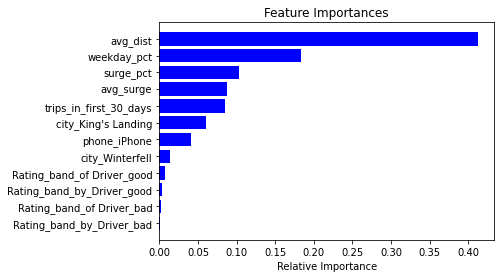

In [104]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

* From the above graph we can see relative importance of the features. We can drop few columns to make model work in much optimized manner.
* Let drop last four attribute to see how the model fare .

In [105]:
df_lr.columns

Index(['trips_in_first_30_days', 'avg_surge', 'surge_pct', 'weekday_pct',
       'avg_dist', 'city_King's Landing', 'city_Winterfell', 'phone_iPhone',
       'Rating_band_by_Driver_bad', 'Rating_band_by_Driver_good',
       'Rating_band_of Driver_bad', 'Rating_band_of Driver_good',
       'status_inactive'],
      dtype='object')

In [107]:
X = df_lr.drop(columns = ['Rating_band_by_Driver_bad', 'Rating_band_by_Driver_good',
       'Rating_band_of Driver_bad', 'Rating_band_of Driver_good','status_inactive'])
y = df_lr['status_inactive']

In [108]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [109]:
model2 = RandomForestClassifier(n_estimators= 75, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [110]:
model2.fit(X_train , y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=75)

In [111]:
model2.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [112]:
print(metrics.classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      3678
           1       0.79      0.79      0.79      6322

    accuracy                           0.73     10000
   macro avg       0.71      0.72      0.72     10000
weighted avg       0.74      0.73      0.73     10000



In [113]:
confusion_matrix(y_test,y_pred)

array([[2377, 1301],
       [1355, 4967]])

As we can see the model is still performing with nearly the same benchmark even after curtailing 4 attributes. 
So this is better model to be implemented as we have reduced the dimensionality without compromising on the performance. 

Let again check on the feature importance 

Text(0.5, 0, 'Relative Importance')

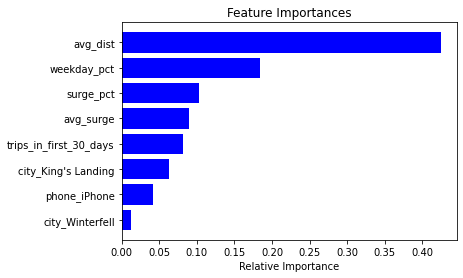

In [115]:
features = X_train.columns

importances = model2.feature_importances_


indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

* Factor which are deciding on the user activness is the amount of avg dist covered by them . Which will be anyway higher for any active user as they will be using services to a larger extent. 
* Other Important factor that weighs in for user active status will the surges applied during weekend . These also play a major role to determin whether user will be retained. 
* User of Kings City seem to have an impact determing the user activity this might be due to frequent commute required by the resident . 
